This notebook computes the Pearson's correlation for heart diseases in order to identify correlation between various attributes.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
!pip install pytrials

In [ ]:
path_reactions = '/content/drive/My Drive/Data_MedEffect/reactions.txt'
path_report_drug_indication = '/content/drive/My Drive/Data_MedEffect/report_drug_indication.txt'
path_reports = '/content/drive/My Drive/Data_MedEffect/reports.txt'

In [ ]:
def strip_quotes(x):
    return x.strip('"') if isinstance(x, str) else x

In [ ]:
dtype_map = {3: str, 4: str}
df_reactions = pd.read_csv(path_reactions, delimiter = "$", header=None, dtype=dtype_map)
df_reactions.columns = ["REACTION_ID", "REPORT_ID", "DURATION", "DURATION_UNIT_ENG", "DURATION_UNIT_FR", "PT_NAME_ENG", "PT_NAME_FR", "SOC_NAME_ENG", "SOC_NAME_FR", "MEDDRA_VERSION"]
df_reactions = df_reactions.applymap(strip_quotes)
df_reactions.drop(columns=["DURATION_UNIT_FR", "PT_NAME_FR", "SOC_NAME_FR", "MEDDRA_VERSION", "REACTION_ID", "DURATION", "DURATION_UNIT_ENG"], inplace=True)
pd.set_option('display.width', 500)
print(df_reactions)
print(df_reactions['SOC_NAME_ENG'].unique())

         REPORT_ID         PT_NAME_ENG                                       SOC_NAME_ENG
0                1            Pruritus             Skin and subcutaneous tissue disorders
1                1              Oedema  General disorders and administration site cond...
2                2           Urticaria             Skin and subcutaneous tissue disorders
3                3            Erythema             Skin and subcutaneous tissue disorders
4                3  Periorbital oedema                                      Eye disorders
...            ...                 ...                                                ...
4179584  906931316            Vomiting                         Gastrointestinal disorders
4179585  906931316    Weight decreased                                     Investigations
4179586  906931316    Weight increased                                     Investigations
4179587  906931316                Acne             Skin and subcutaneous tissue disorders
4179588  9

In [ ]:
df_drugs= pd.read_csv(path_report_drug_indication, delimiter = "$", header=None)
df_drugs.columns = ["REPORT_DRUG_ID", "REPORT_ID", "DRUG_PRODUCT_ID", "DRUGNAME", "INDICATION_NAME_ENG", "INDICATION_NAME_FR"]
df_drugs = df_drugs.applymap(strip_quotes)
df_drugs.drop(columns=["INDICATION_NAME_FR", "REPORT_DRUG_ID"], inplace=True)
print(df_drugs)
pd.set_option('display.max_columns', None)
#print(len(df_drugs["INDICATION_NAME_ENG"].unique()))

         REPORT_ID  DRUG_PRODUCT_ID                      DRUGNAME                  INDICATION_NAME_ENG
0           300198           8741.0           NOVO VENLAFAXINE XR                           Depression
1           300548           2751.0               BENADRYL ELIXIR  Product used for unknown indication
2           300488           9223.0                      ELOXATIN                         Colon cancer
3           301050           7563.0  TWINJECT 0.3MG AUTO-INJECTOR                Anaphylactic reaction
4           300841           7360.0               APO-PROPAFENONE  Product used for unknown indication
...            ...              ...                           ...                                  ...
2988921    1069622          16846.0                       ENHERTU          HER2 positive breast cancer
2988922     972418          25917.0                       XELJANZ  Product used for unknown indication
2988923     972418          22637.0                    CETIRIZINE  Produc

In [ ]:
heart_disease_terms = [
    "HIGH BLOOD PRESSURE MEDS", "Arrhythmia", "Heart rate irregular", "Heart transplant",
    "Heart disease congenital", "Cardiac disorder", "Heart rate",
    "Ischaemic heart disease prophylaxis", "Heart block congenital", "Heart rate increased",
    "Heart rate abnormal", "Congenital heart valve disorder", "Heart valve replacement",
    "Univentricular heart", "Cardiac valve disease", "Metastases to heart", "Heart valve operation",
    "Heart rate decreased", "Hypoplastic left heart syndrome", "Ischaemic cardiomyopathy",
    "Heart valve incompetence", "Heart and lung transplant", "Hypertensive heart disease",
    "Rheumatic heart disease", "Heart transplant rejection", "Complications of transplanted heart",
    "Dilated cardiomyopathy", "Artificial heart device user", "Cardiac failure congestive",
    "Postural orthostatic tachycardia syndrome", "Cardiovascular disorder", "Pericarditis",
    "Myocardial ischaemia", "Myocardial infarction", "Cardiovascular event prophylaxis",
    "Pericardial mesothelioma malignant", "Cardiopulmonary failure", "Cardiac failure",
    "Cardiac failure congestive", "Endocarditis", "Arrhythmia prophylaxis", "Hypertrophic cardiomyopathy",
    "Cardiomyopathy", "Cardiogenic shock", "Cardiac amyloidosis", "Cardiac sarcoidosis",
    "Atrial tachycardia", "Cardioversion", "Tachycardia", "Coronary artery disease",
    "Transcatheter aortic valve implantation", "Aortic valve replacement", "Aortic bypass",
    "Aortic valve disease", "Aortic stenosis", "Aortic dissection", "Aortic thrombosis",
    "Coarctation of the aorta", "Aortic aneurysm rupture", "Transcatheter aortic valve implantation",
    "Aortitis", "Aortic valve repair", "Aortic aneurysm", "Aorta hypoplasia", "Coarctation of the aorta",
    "Angina pectoris", "Ischaemic stroke", "Haemorrhagic stroke", "Embolic stroke",
    "Atrial fibrillation", "Pulmonary arterial hypertension"
]
df_drugs = df_drugs[df_drugs['INDICATION_NAME_ENG'].isin(heart_disease_terms)]

In [ ]:
dtype_map = {1: str, 5: str,16: str,39: str,40: str,41: str}
df_reports = pd.read_csv(path_reports, delimiter = "$", header=None, dtype=dtype_map)
df_reports.columns = [
    "REPORT_ID", "REPORT_NO", "VERSION_NO", "DATRECEIVED", "DATINTRECEIVED", "MAH_NO",
    "REPORT_TYPE_CODE", "REPORT_TYPE_ENG", "REPORT_TYPE_FR", "GENDER_CODE", "GENDER_ENG",
    "GENDER_FR", "AGE", "AGE_Y", "AGE_UNIT_ENG", "AGE_UNIT_FR", "OUTCOME_CODE",
    "OUTCOME_ENG", "OUTCOME_FR", "WEIGHT", "WEIGHT_UNIT_ENG", "WEIGHT_UNIT_FR", "HEIGHT",
    "HEIGHT_UNIT_ENG", "HEIGHT_UNIT_FR", "SERIOUSNESS_CODE", "SERIOUSNESS_ENG", "SERIOUSNESS_FR",  "DEATH",
    "DISABILITY", "CONGENITAL_ANOMALY", "LIFE_THREATENING", "HOSP_REQUIRED",
    "OTHER_MEDICALLY_IMP_COND", "REPORTER_TYPE_ENG", "REPORTER_TYPE_FR",
    "SOURCE_CODE", "SOURCE_ENG","SOURCE_FR", "E2B_IMP_SAFETYREPORT_ID",
    "AUTHORITY_NUMB", "COMPANY_NUMB"]
df_reports = df_reports.applymap(strip_quotes)

#make sure age, height, and weight are in the same unit of measurement
def convert_age(row):
    if row["AGE_UNIT_ENG"] == "Years":
        return row["AGE"]
    elif row["AGE_UNIT_ENG"] == "Months":
        return row["AGE"] / 12
    elif row["AGE_UNIT_ENG"] == "Weeks":
        return row["AGE"] / 52
    elif row["AGE_UNIT_ENG"] == "Days":
        return row["AGE"] / 365
    elif row["AGE_UNIT_ENG"] == "Hours":
        return row["AGE"] / 8760
    elif row["AGE_UNIT_ENG"] == "Decade":
        return row["AGE"]*10
    else:
        return row["AGE"]

def convert_height(row):
    if row["HEIGHT_UNIT_ENG"] == "Centimeter":
        return row["HEIGHT"] / 100
    if row["HEIGHT_UNIT_ENG"] == "Inch":
        return row["HEIGHT"] * 0.0254
    else:
        return row["HEIGHT"]

# Function to convert weight to kilograms
def convert_weight(row):
    if row["WEIGHT_UNIT_ENG"] == "Pound":
        return row["WEIGHT"] * 0.453592
    else:
        return row["WEIGHT"]

df_reports["AGE"] = df_reports.apply(lambda row: convert_age(row), axis=1)
df_reports["HEIGHT_M"] = df_reports.apply(lambda row: convert_height(row), axis=1)
df_reports["WEIGHT_KG"] = df_reports.apply(lambda row: convert_weight(row), axis=1)


df_reports.drop(columns=["VERSION_NO", "DATINTRECEIVED", "MAH_NO",
    "REPORT_TYPE_FR", "GENDER_FR", "AGE_Y", "AGE_UNIT_FR", "OUTCOME_CODE","GENDER_CODE",
    "OUTCOME_FR", "WEIGHT_UNIT_FR", "HEIGHT_UNIT_FR", "SERIOUSNESS_FR", "REPORTER_TYPE_FR",
    "SOURCE_CODE", "SOURCE_FR", "E2B_IMP_SAFETYREPORT_ID", "AUTHORITY_NUMB", "COMPANY_NUMB", "REPORTER_TYPE_ENG",
    "SOURCE_ENG", "REPORT_TYPE_CODE", "REPORT_NO", "OUTCOME_ENG", "SERIOUSNESS_CODE", "DISABILITY",
    "REPORT_TYPE_ENG", "AGE_UNIT_ENG", "HEIGHT_UNIT_ENG", "WEIGHT_UNIT_ENG", "CONGENITAL_ANOMALY", "HOSP_REQUIRED", "WEIGHT", "HEIGHT"], inplace=True)

print(df_reports)
count_females = df_reports["GENDER_ENG"].value_counts().get('Female', 0)
count_males = df_reports["GENDER_ENG"].value_counts().get('Male', 0)
print("Number of Females:", count_females)
print("Number of Males:", count_males)
print(df_reports['DEATH'].unique())

         REPORT_ID DATRECEIVED GENDER_ENG   AGE SERIOUSNESS_ENG  DEATH  LIFE_THREATENING  OTHER_MEDICALLY_IMP_COND  HEIGHT_M  WEIGHT_KG
0                1   05-JUN-73     Female  62.0     Not Serious    NaN               NaN                       NaN      1.55       66.0
1                2   05-JUN-73     Female  70.0     Not Serious    NaN               NaN                       NaN       NaN        NaN
2                3   05-JUN-73       Male  83.0         Serious    NaN               NaN                       NaN      1.73       44.0
3                4   05-JUN-73     Female  78.0         Serious    NaN               NaN                       NaN       NaN        NaN
4                5   05-JUN-73     Female  55.0     Not Serious    NaN               NaN                       NaN       NaN        NaN
...            ...         ...        ...   ...             ...    ...               ...                       ...       ...        ...
1090228  907053719   31-JAN-24       Male   NaN 

In [ ]:
# print(df_reports['OTHER_MEDICALLY_IMP_COND'].unique())
# print(df_reports['GENDER_CODE'].unique())

In [ ]:
df_merged = pd.merge(df_reactions, df_reports, on='REPORT_ID', how='inner')
df_merged = pd.merge(df_merged, df_drugs, on='REPORT_ID', how='inner')

print(df_merged)

        REPORT_ID              PT_NAME_ENG           SOC_NAME_ENG DATRECEIVED GENDER_ENG   AGE SERIOUSNESS_ENG  DEATH  LIFE_THREATENING  OTHER_MEDICALLY_IMP_COND  HEIGHT_M  WEIGHT_KG  DRUG_PRODUCT_ID           DRUGNAME          INDICATION_NAME_ENG
0          139750      Atrial fibrillation      Cardiac disorders   10-DEC-15     Female  63.0         Serious    2.0               2.0                       1.0       NaN        NaN          40442.0  DIGOXIN [DIGOXIN]          Atrial fibrillation
1          139750                 Embolism     Vascular disorders   10-DEC-15     Female  63.0         Serious    2.0               2.0                       1.0       NaN        NaN          40442.0  DIGOXIN [DIGOXIN]          Atrial fibrillation
2          139750      Blindness transient          Eye disorders   10-DEC-15     Female  63.0         Serious    2.0               2.0                       1.0       NaN        NaN          40442.0  DIGOXIN [DIGOXIN]          Atrial fibrillation
3       

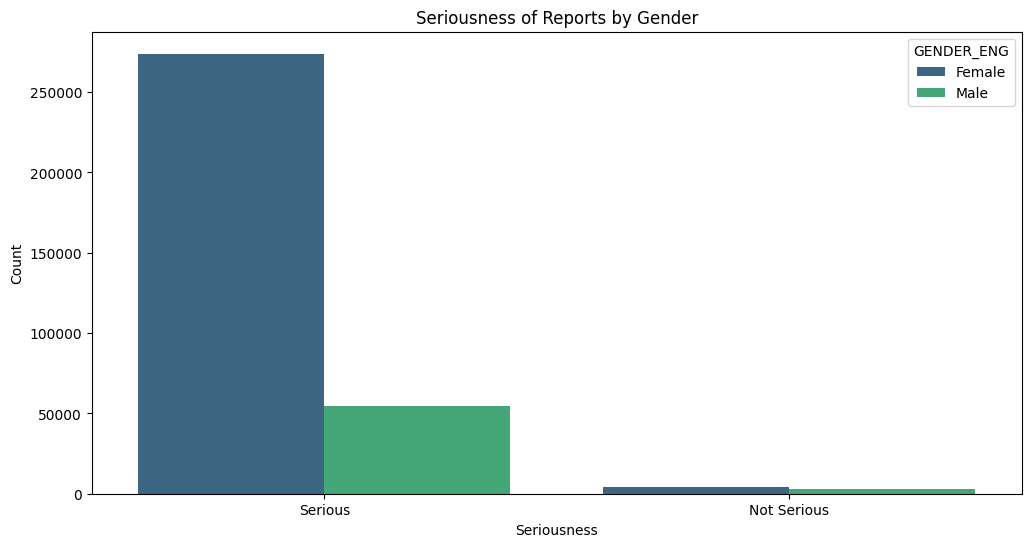

In [ ]:
# plot to visualize seriousness of side effects by gender
plt.figure(figsize=(12, 6))
sns.countplot(data=df_merged, x='SERIOUSNESS_ENG', hue='GENDER_ENG', palette='viridis')
plt.title('Seriousness of Reports by Gender')
plt.xlabel('Seriousness')
plt.ylabel('Count')
plt.show()

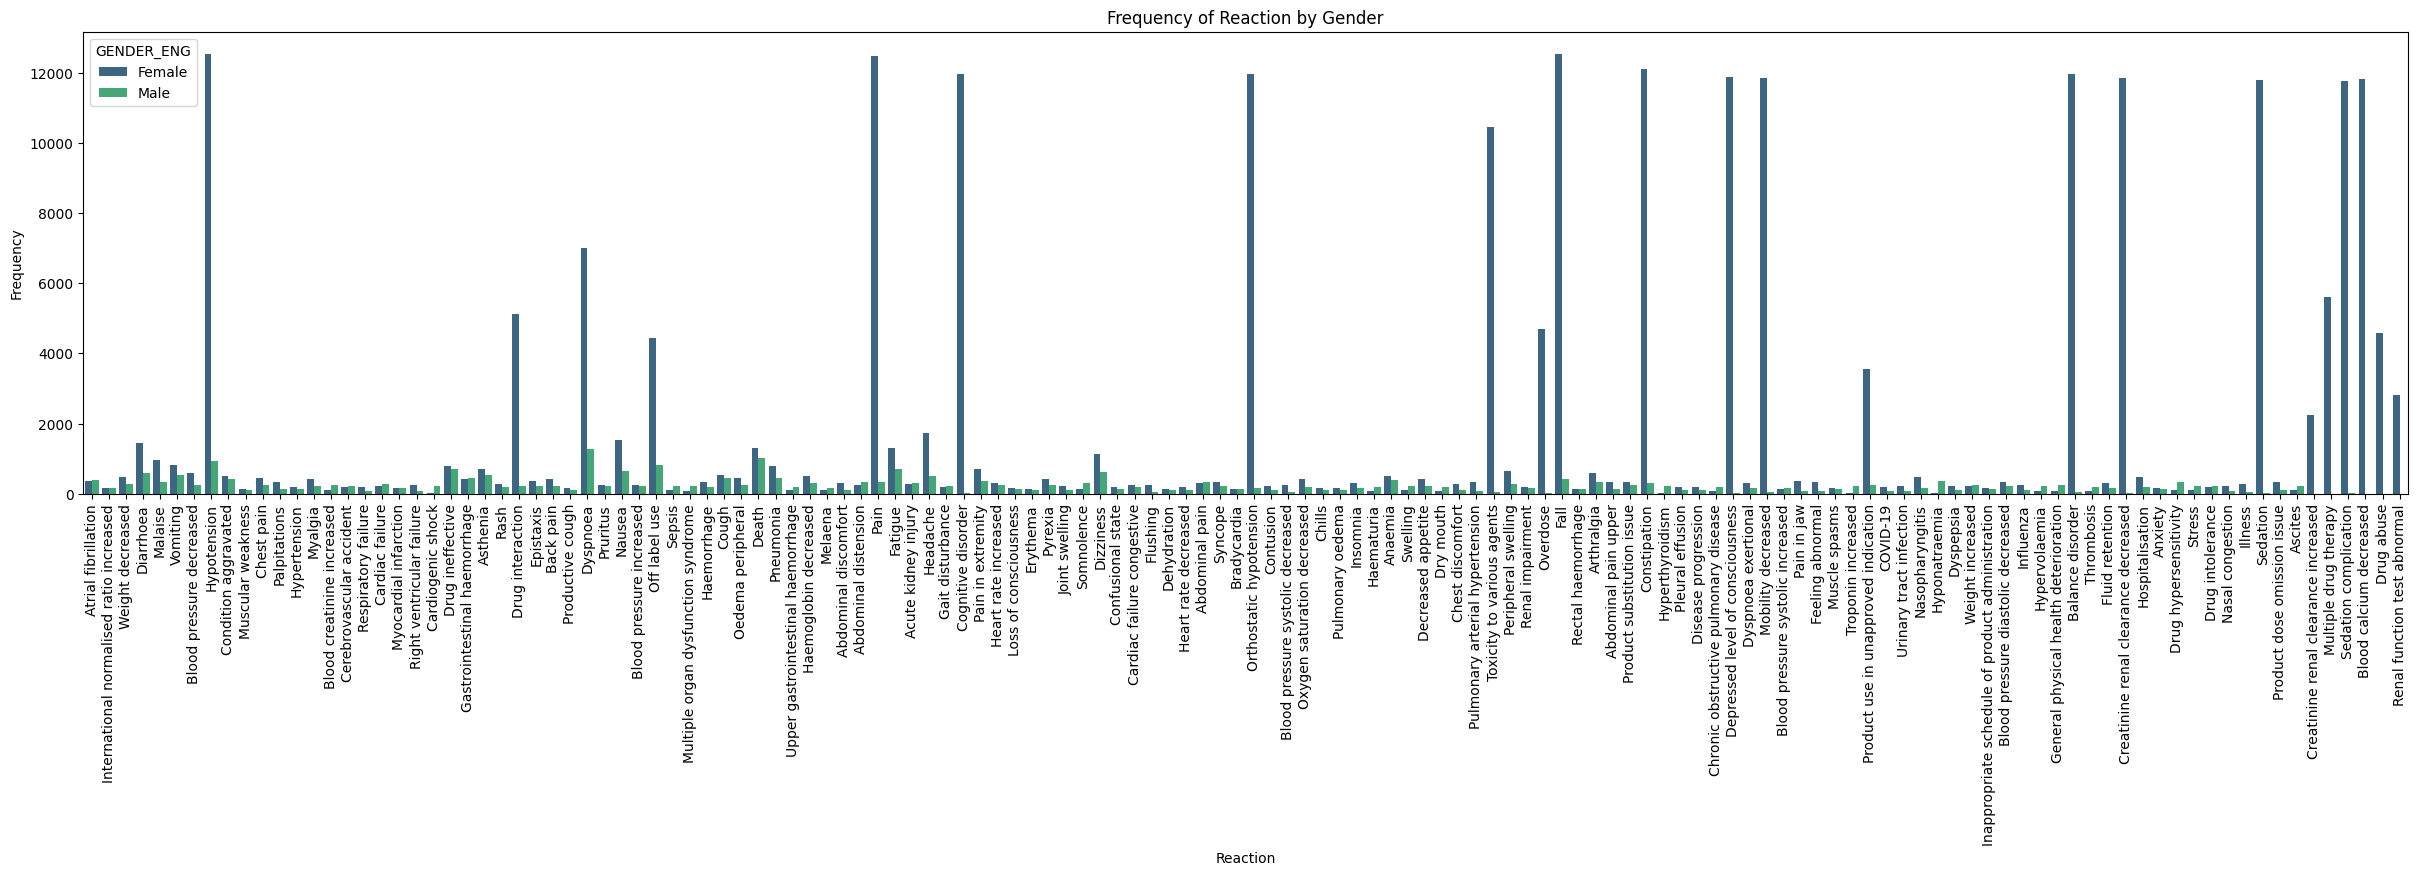

In [ ]:
#find most common reactions
drug_gender_counts = df_merged.groupby(['PT_NAME_ENG', 'GENDER_ENG']).size().unstack(fill_value=0)
drug_gender_counts['Total'] = drug_gender_counts.sum(axis=1)

#  Filter drugs where the total count is at least a certain number
min_total_count = 250  # Example threshold (adjust as needed)
drugs_with_min_count = drug_gender_counts[drug_gender_counts['Total'] >= min_total_count].index

# Calculate percentage difference between genders
# drug_gender_counts['Percentage_Difference'] = abs(drug_gender_counts['Male'] - drug_gender_counts['Female']) / drug_gender_counts['Total'] * 100

# Filter drugs where the percentage difference is at least a certain percentage
# min_percentage_difference = 25  # Example threshold (adjust as needed)
# drugs_with_min_percentage_difference = drug_gender_counts[drug_gender_counts.index.isin(drugs_with_min_count) & (drug_gender_counts['Percentage_Difference'] >= min_percentage_difference)].index

#  Filter the original DataFrame by drugs with minimum count and percentage difference
df_filtered = df_merged[df_merged['PT_NAME_ENG'].isin(drugs_with_min_count)]

plt.figure(figsize=(30, 6))
sns.countplot(data=df_filtered, x="PT_NAME_ENG", hue="GENDER_ENG", palette="viridis")
plt.title("Frequency of Reaction by Gender")
plt.xlabel("Reaction")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontsize = 10)
plt.show()

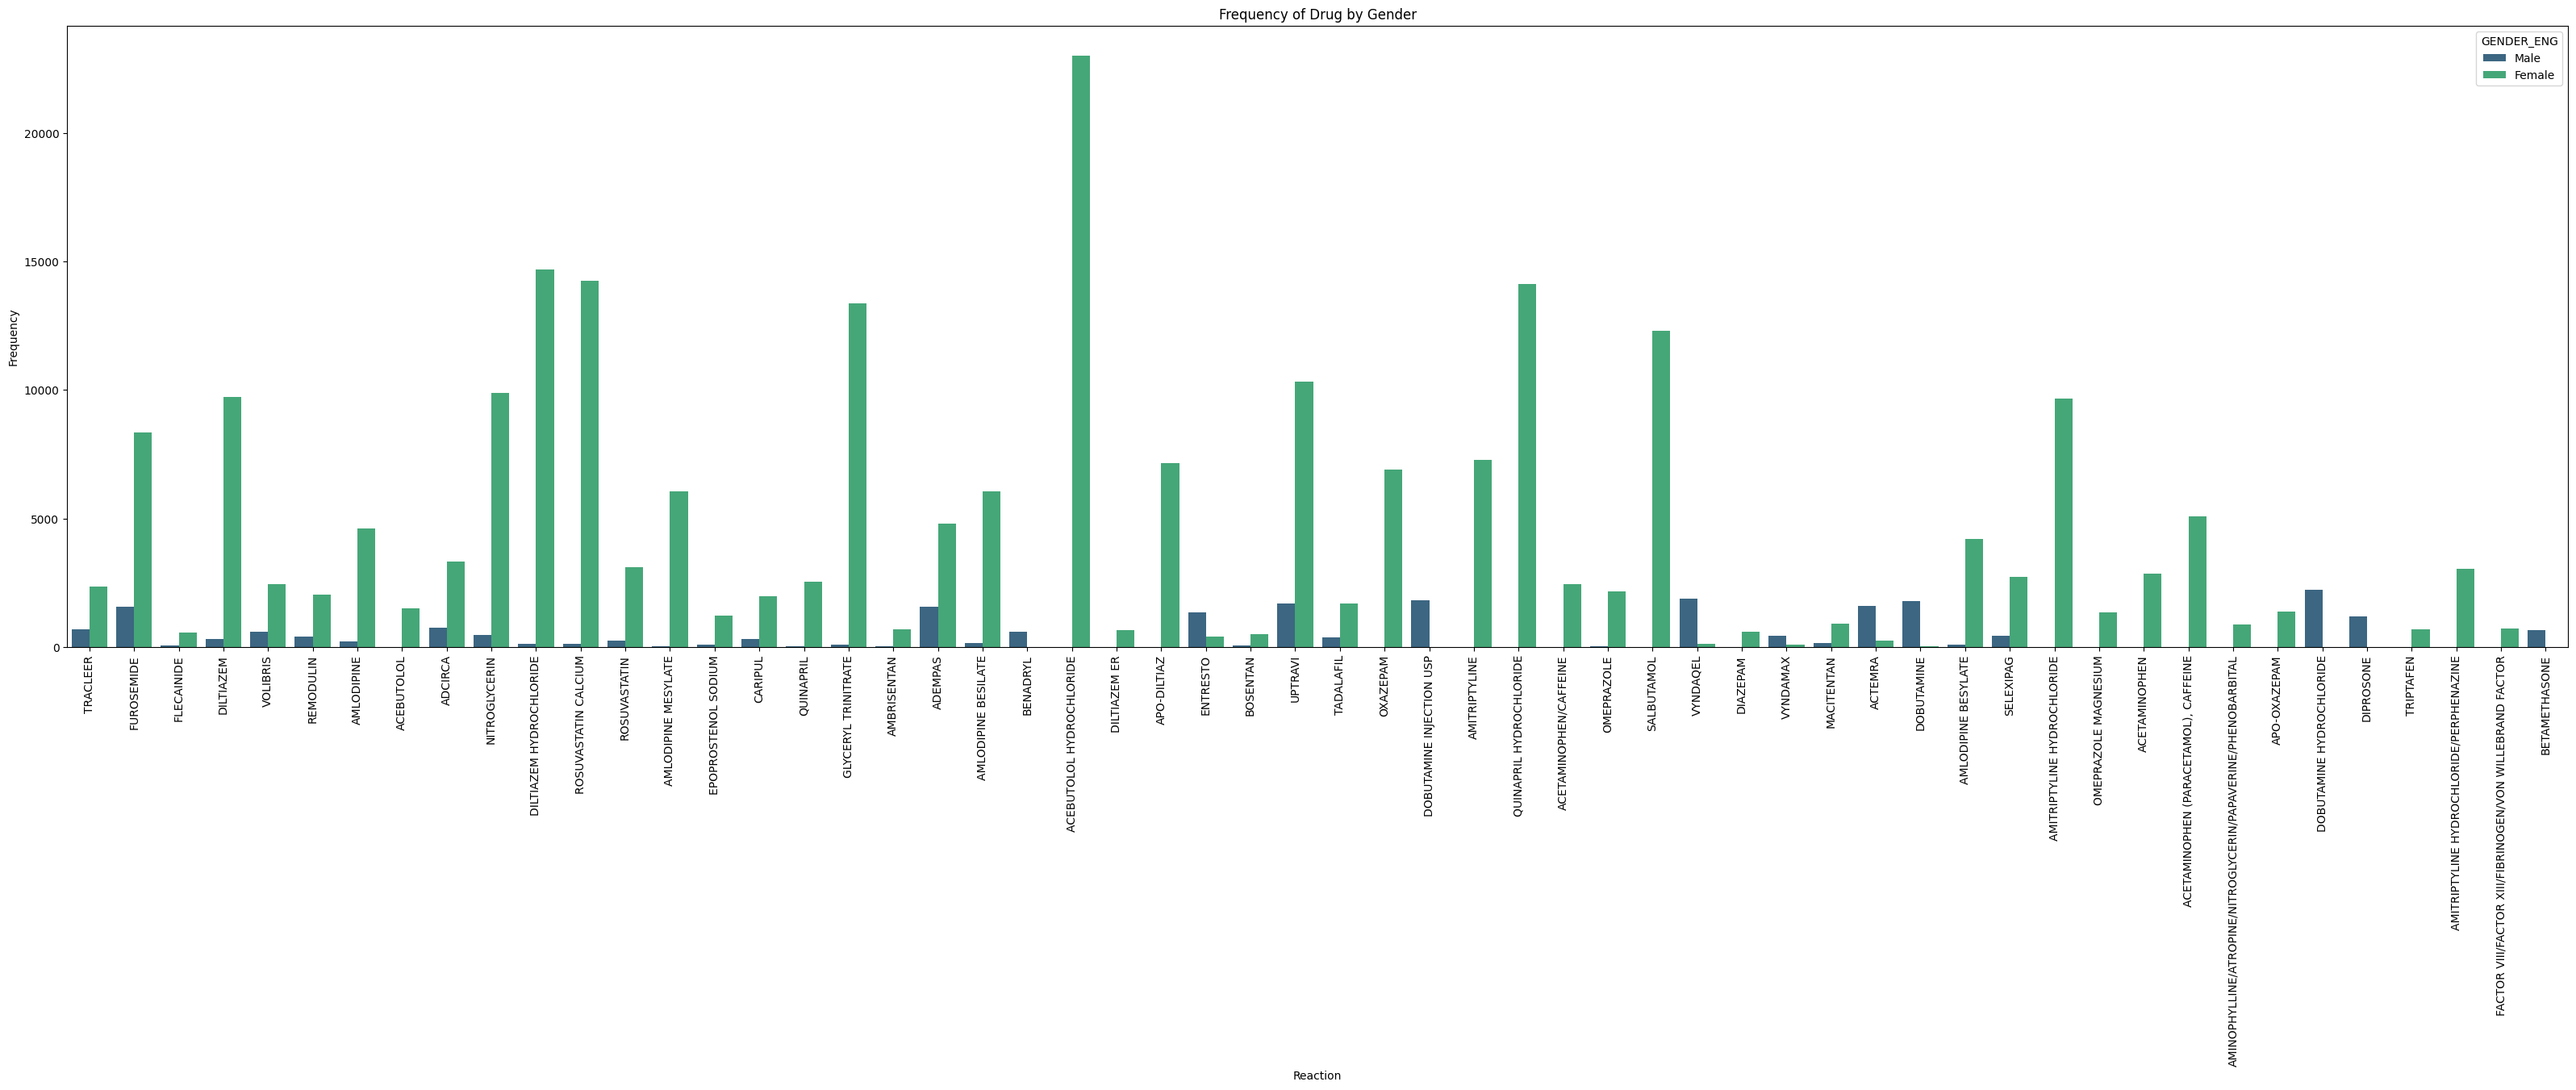

In [ ]:
#find the drugs with min count of 500, and display by gender
drug_gender_counts = df_merged.groupby(['DRUGNAME', 'GENDER_ENG']).size().unstack(fill_value=0)
drug_gender_counts['Total'] = drug_gender_counts.sum(axis=1)

#  Filter drugs where the total count is at least a certain number
min_total_count = 500  # Example threshold (adjust as needed)
drugs_with_min_count = drug_gender_counts[drug_gender_counts['Total'] >= min_total_count].index

#  Calculate percentage difference between genders
drug_gender_counts['Percentage_Difference'] = abs(drug_gender_counts['Male'] - drug_gender_counts['Female']) / drug_gender_counts['Total'] * 100

#  Filter drugs where the percentage difference is at least a certain percentage
min_percentage_difference = 50  # Example threshold (adjust as needed)
drugs_with_min_percentage_difference = drug_gender_counts[drug_gender_counts.index.isin(drugs_with_min_count) & (drug_gender_counts['Percentage_Difference'] >= min_percentage_difference)].index

#  Filter the original DataFrame by drugs with minimum count and percentage difference
df_filtered = df_merged[df_merged['DRUGNAME'].isin(drugs_with_min_percentage_difference)]

plt.figure(figsize=(40, 10))
sns.countplot(data=df_filtered, x="DRUGNAME", hue="GENDER_ENG", palette="viridis")
plt.title("Frequency of Drug by Gender")
plt.xlabel("Reaction")
plt.ylabel("Frequency")
plt.xticks(rotation=90, fontsize = 10)
plt.show()


In [ ]:
# #age distribution by gender for all reports

# plt.figure(figsize=(12, 6))
# sns.histplot(data=df_merged, x='AGE', hue='GENDER_ENG', multiple='layer', kde=True,palette='viridis', stat='count')
# plt.title('Age Distribution by Gender')
# plt.xlabel('Age')
# plt.ylabel('Frequency')
# plt.xlim(0, 100)  # Set the limit for the x-axis
# plt.show()

<ipython-input-38-0ec86b7f5f3a>:11: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df_merged, x="Year", multiple='dodge', palette='viridis', stat='count', bins=len(df_merged['Year'].unique()))


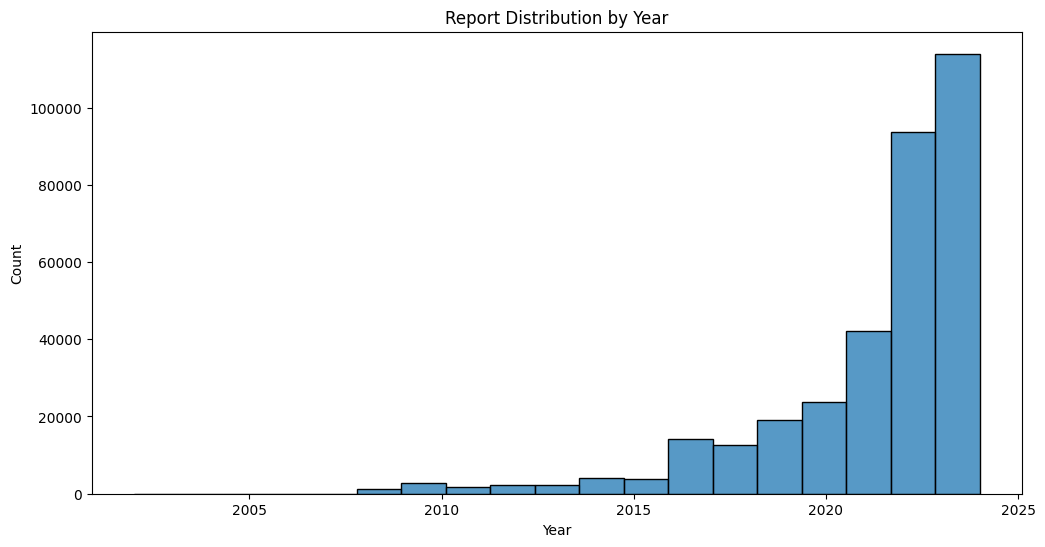

In [ ]:
#string parser for date time -> return year
def parse_and_extract_year(date_str):
    dt = datetime.strptime(date_str, '%d-%b-%y')
    return dt.year

# Convert DATRECEIVED to datetime and extract year
df_merged['Year'] = df_merged['DATRECEIVED'].apply(parse_and_extract_year) # add year column to DF

# Plot the report distribution by year
plt.figure(figsize=(12, 6))
sns.histplot(data=df_merged, x="Year", multiple='dodge', palette='viridis', stat='count', bins=len(df_merged['Year'].unique()))
plt.title('Report Distribution by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

In [ ]:
# df_merged = df_merged.drop(columns=['DATRECEIVED', "PT_NAME_ENG", "DEATH",
#                                     "LIFE_THREATENING", "OTHER_MEDICALLY_IMP_COND","DRUG_PRODUCT_ID", "INDICATION_NAME_ENG"])
# print(df_merged)
# print(df_merged['DRUGNAME'].unique())

In [ ]:
# clean up data and encode categorical for gender, get rid of NAN values
pd.set_option('display.max_seq_items', None)  # No limit on the number of displayed items in a sequence
print(df_merged['DRUGNAME'].unique())
median_age = df_merged['AGE'].median()
# Fill NaN values in AGE with the median age
df_merged['AGE'].fillna(median_age, inplace=True)

median_weight_by_gender = df_merged.groupby('GENDER_ENG')['WEIGHT_KG'].transform('median')
median_height_by_gender = df_merged.groupby('GENDER_ENG')['HEIGHT_M'].transform('median')

# Fill NaN values in WEIGHT_KG and HEIGHT_M with the median values based on gender
df_merged['WEIGHT_KG'].fillna(median_weight_by_gender, inplace=True)
df_merged['HEIGHT_M'].fillna(median_height_by_gender, inplace=True)

# choose to visualize correlation between drug and disease
df_merged = df_merged[df_merged["DRUGNAME"].isin(["DILTIAZEM"])]
df_merged = df_merged[df_merged["INDICATION_NAME_ENG"].isin(["Heart rate increased"])]
print(df_merged)
one_hot_encoded = pd.get_dummies(df_merged[['GENDER_ENG', "PT_NAME_ENG", "SERIOUSNESS_ENG"]])
print(one_hot_encoded)

['DIGOXIN [DIGOXIN]' 'TRACLEER' 'SOTALOL' ...
 'LOVENOX HP SINGLE DOSE PRE-FILLED SYRINGE 120MG/0.8ML' 'STELARA'
 'FERRIPROX']
        REPORT_ID                        PT_NAME_ENG                                       SOC_NAME_ENG DATRECEIVED GENDER_ENG   AGE SERIOUSNESS_ENG  DEATH  LIFE_THREATENING  OTHER_MEDICALLY_IMP_COND  HEIGHT_M  WEIGHT_KG  DRUG_PRODUCT_ID   DRUGNAME   INDICATION_NAME_ENG  Year
34928   900024895                    Nasopharyngitis                        Infections and infestations   17-DEC-20     Female  32.0         Serious    2.0               2.0                       1.0       1.6    81.6000          37243.0  DILTIAZEM  Heart rate increased  2020
34929   900024895          Infusion related reaction     Injury, poisoning and procedural complications   17-DEC-20     Female  32.0         Serious    2.0               2.0                       1.0       1.6    81.6000          37243.0  DILTIAZEM  Heart rate increased  2020
34930   900024895                         

In [ ]:
# add numerical features to correlation matrix
numerical_features = df_merged[['AGE', 'WEIGHT_KG', 'HEIGHT_M']]
combined_df = pd.concat([numerical_features, one_hot_encoded], axis=1)
print(combined_df)

         AGE  WEIGHT_KG  HEIGHT_M  GENDER_ENG_Female  GENDER_ENG_Male  PT_NAME_ENG_Arthralgia  PT_NAME_ENG_Asthenia  PT_NAME_ENG_Bronchitis  PT_NAME_ENG_Chest discomfort  PT_NAME_ENG_Chest pain  PT_NAME_ENG_Cognitive disorder  PT_NAME_ENG_Confusional state  PT_NAME_ENG_Cough  PT_NAME_ENG_Delirium  PT_NAME_ENG_Diarrhoea  PT_NAME_ENG_Dizziness  PT_NAME_ENG_Drug ineffective  PT_NAME_ENG_Dyspnoea  PT_NAME_ENG_Fall  PT_NAME_ENG_Fatigue  PT_NAME_ENG_Fibrin D dimer increased  \
34928   32.0    81.6000       1.6               True            False                   False                 False                   False                         False                   False                           False                          False              False                 False                  False                  False                         False                 False             False                False                                 False   
34929   32.0    81.6000       1.6               

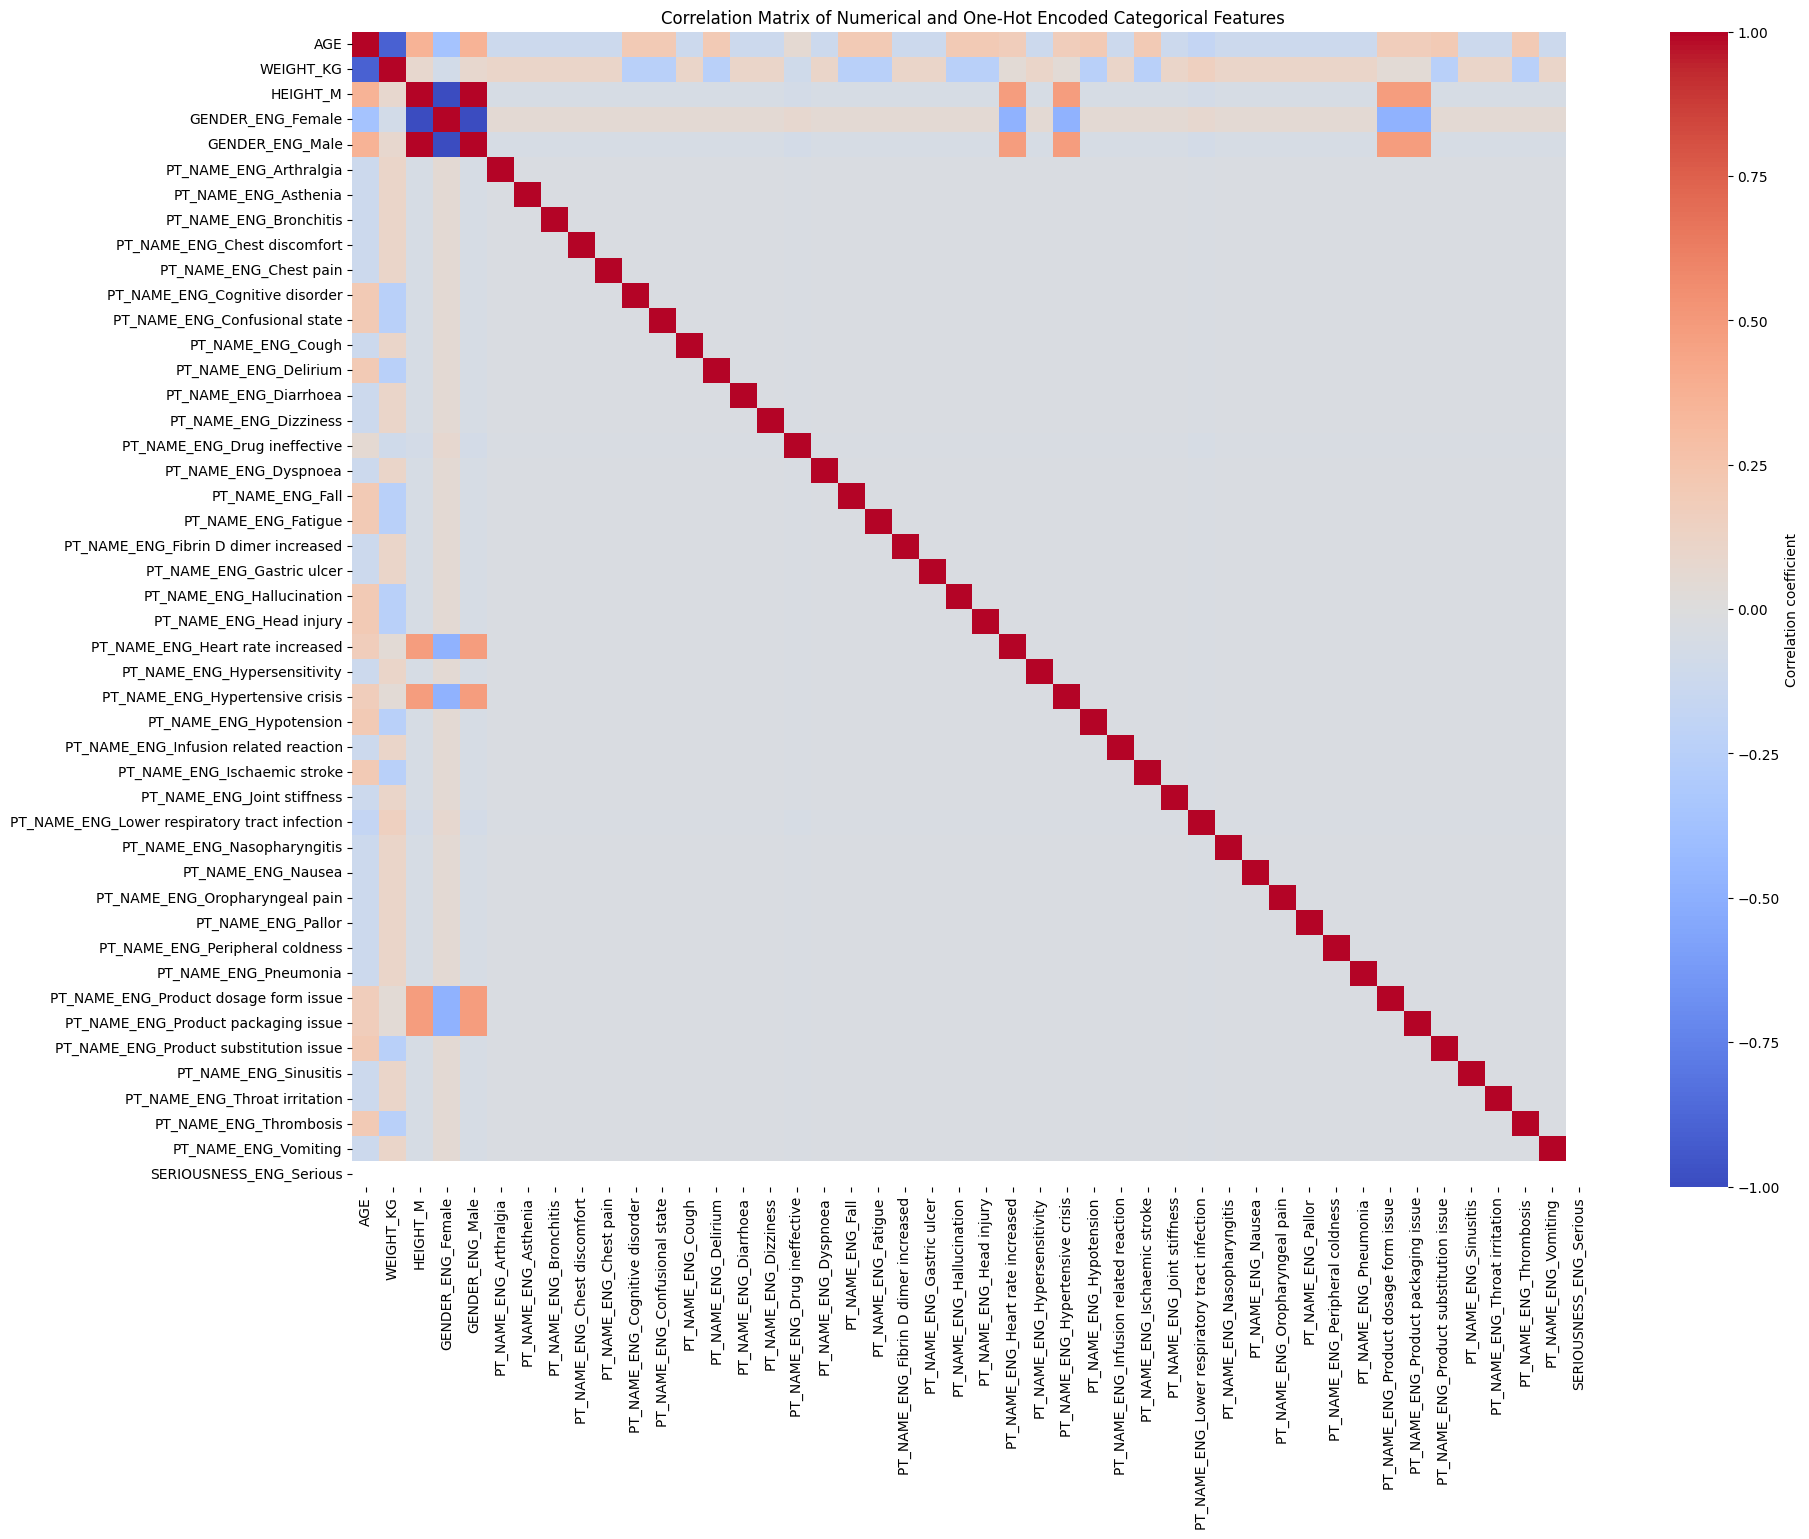

In [ ]:
correlation_matrix = combined_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Numerical and One-Hot Encoded Categorical Features')
plt.show()

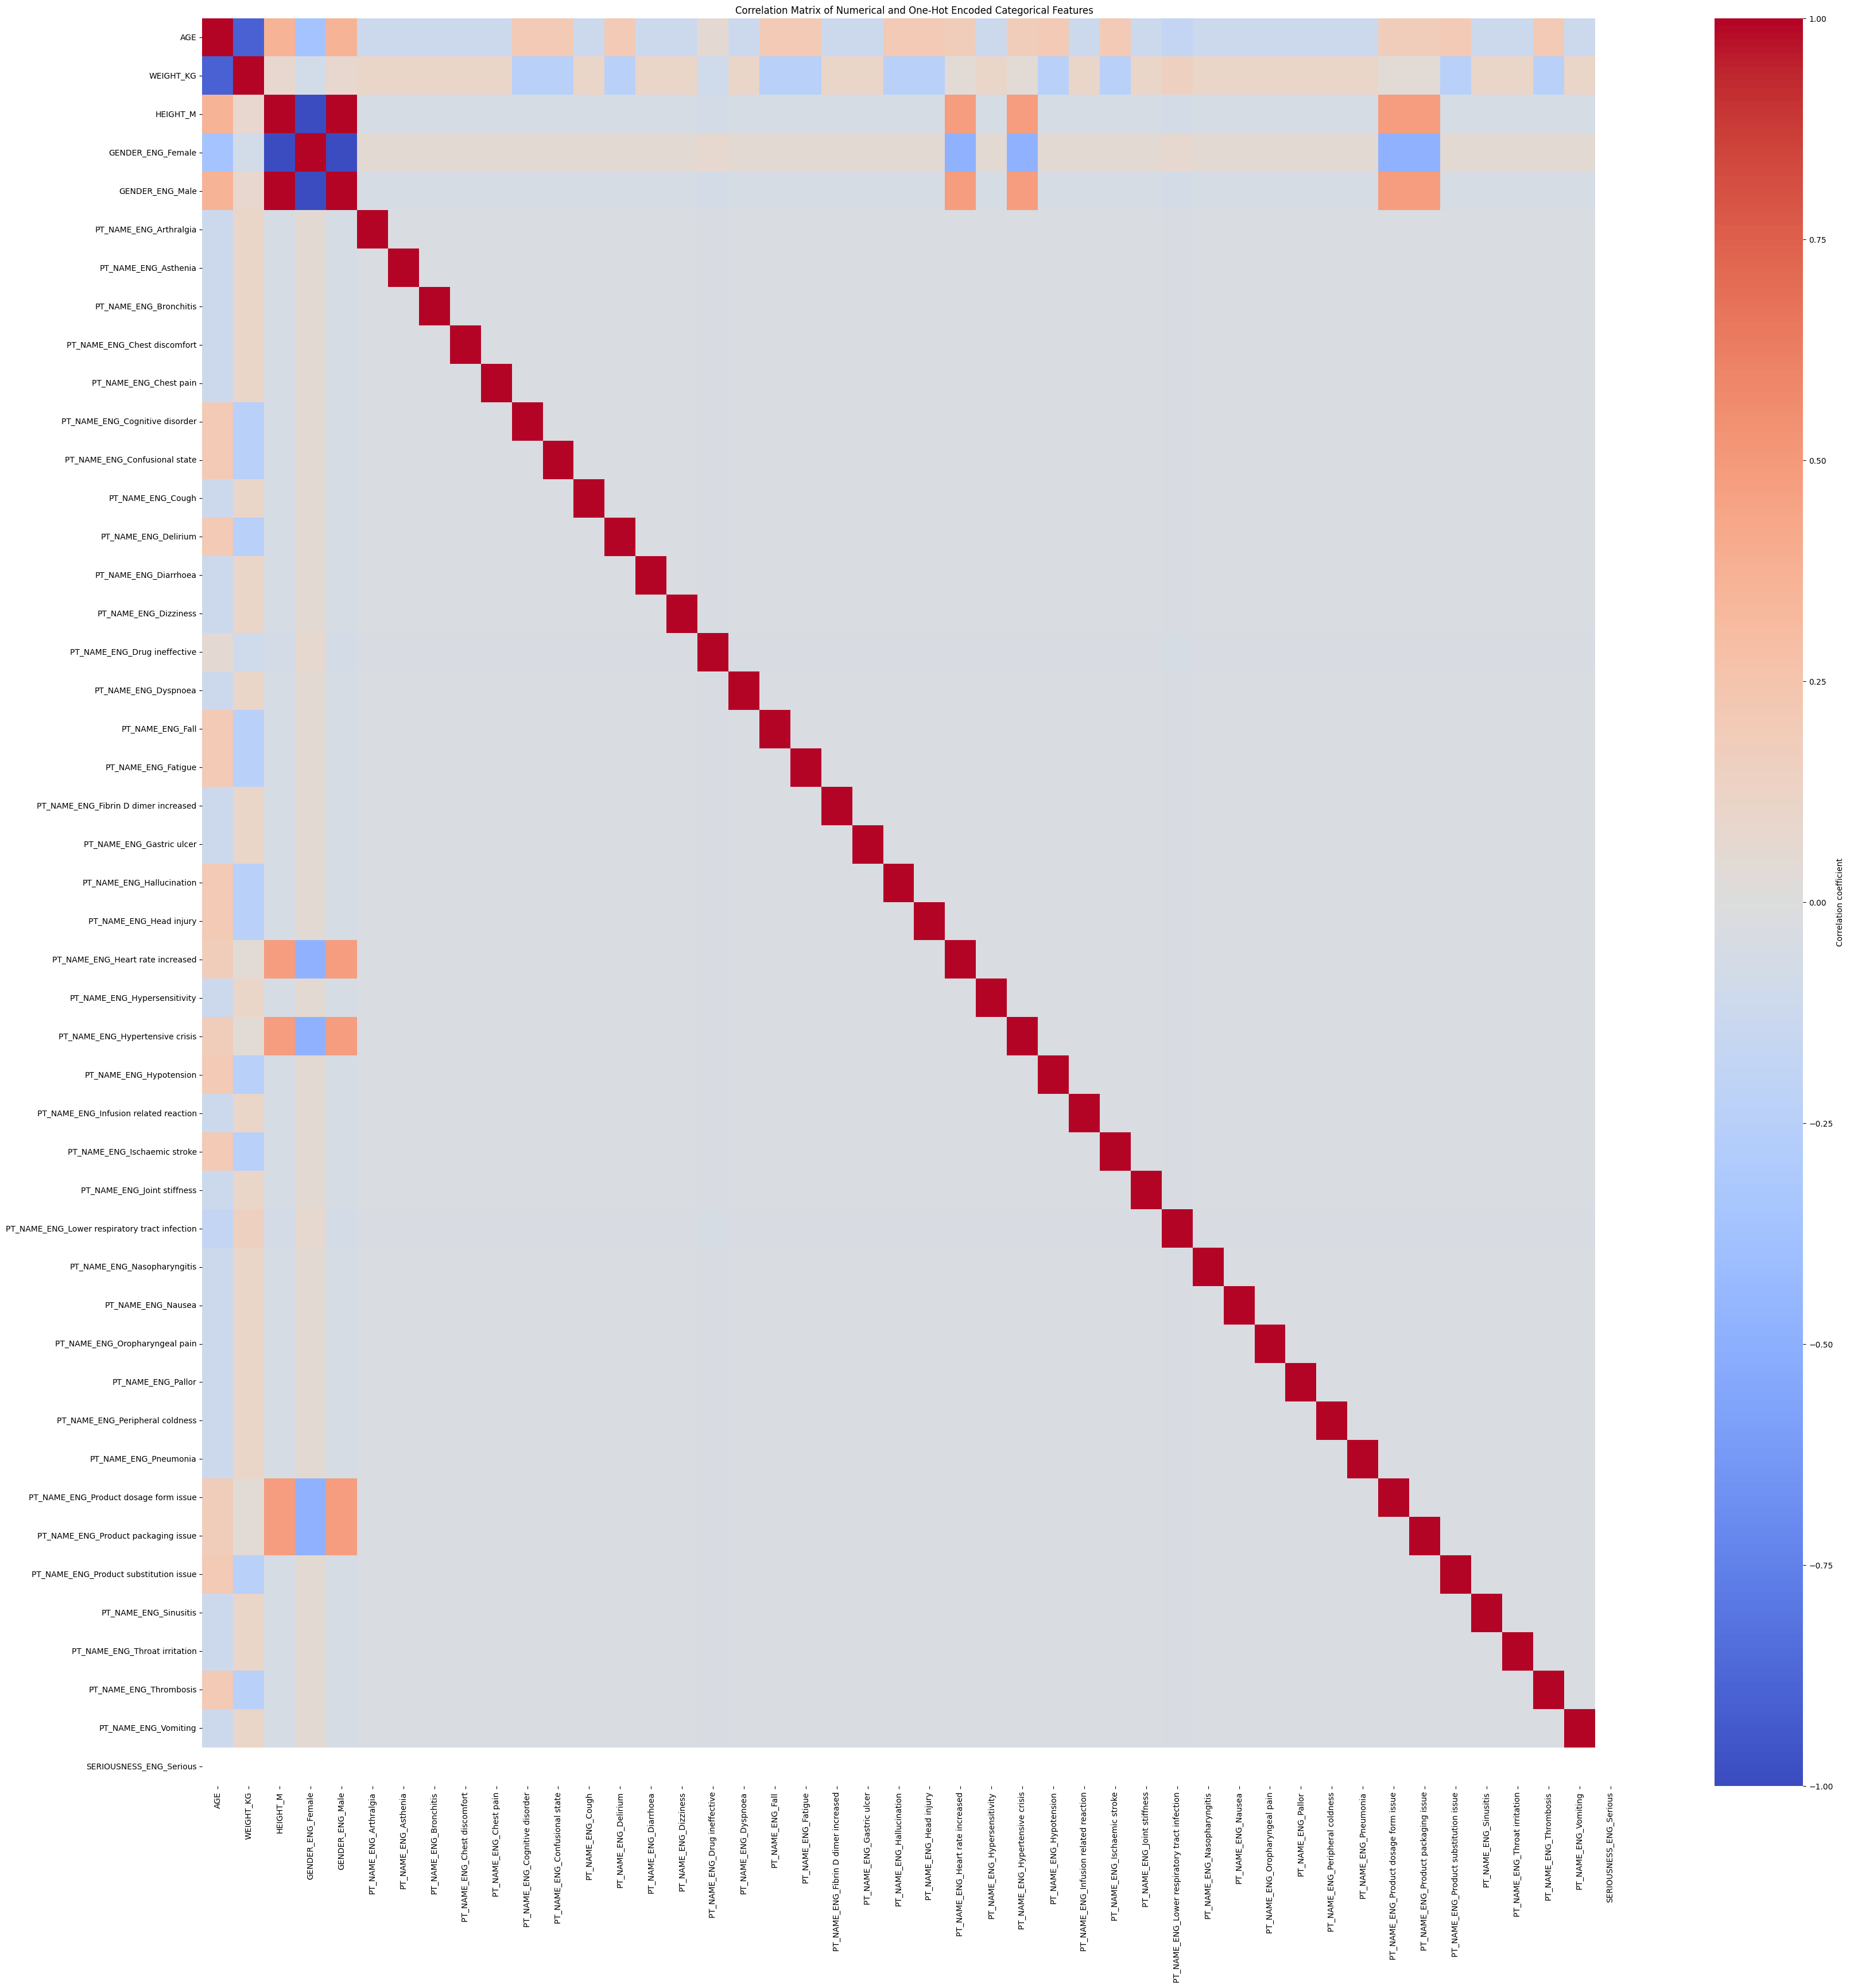

In [ ]:
plt.figure(figsize=(40,40))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', cbar_kws={'label': 'Correlation coefficient'})
plt.title('Correlation Matrix of Numerical and One-Hot Encoded Categorical Features')
plt.show()

Study ID: NCT00164801
No results found.
Study ID: NCT02479204
No results found.
Study ID: NCT00413712
No results found.
Study ID: NCT02653872
Total Participants: 15
Female Count: 0 (0.00%)
Male Count: 15 (100.00%)


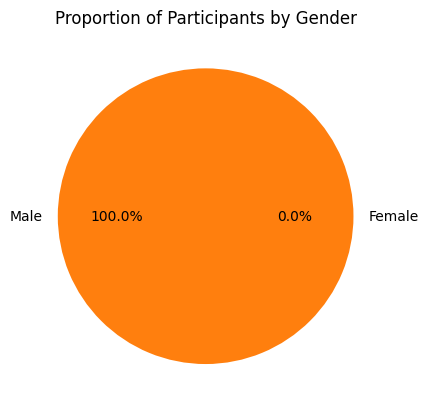

Study ID: NCT00318201
No results found.
Study ID: NCT05563168
No results found.
Study ID: NCT00983372
Total Participants: 24
Female Count: 9 (37.50%)
Male Count: 15 (62.50%)


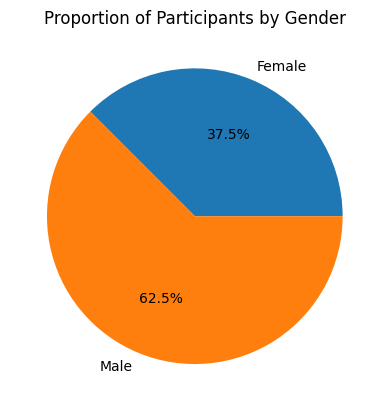

Study ID: NCT00552669
Total Participants: 200
Female Count: 36 (18.00%)
Male Count: 164 (82.00%)


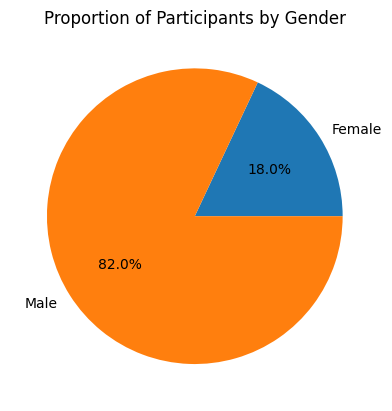

Study ID: NCT04136210
No results found.
Study ID: NCT00319982
Total Participants: 38
Female Count: 22 (57.89%)
Male Count: 16 (42.11%)


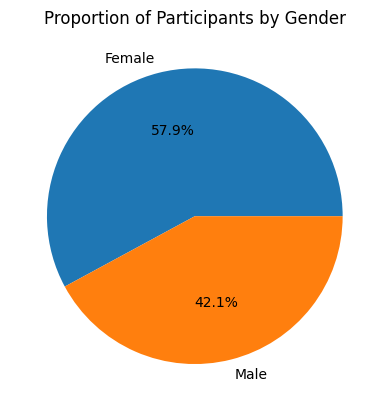

Study ID: NCT06276127
No results found.
Study ID: NCT04790331
No results found.
Study ID: NCT04372082
No results found.
Study ID: NCT04467931
No results found.
Study ID: NCT03752931
No results found.
Study ID: NCT01821274
No results found.
Study ID: NCT02695992
No results found.
Study ID: NCT01162902
No results found.
Study ID: NCT01690221
No results found.
Study ID: NCT05261464
No results found.
Study ID: NCT01655303
No results found.
Study ID: NCT03881943
No results found.
Study ID: NCT03776838
No results found.
Study ID: NCT01505179
Total Participants: 10
Female Count: 7 (70.00%)
Male Count: 3 (30.00%)


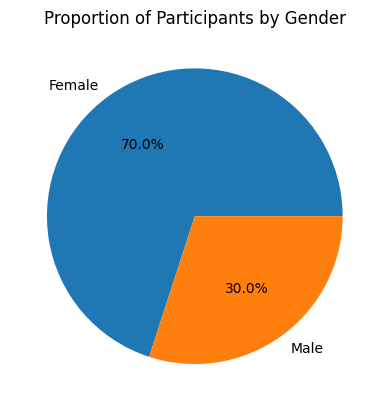

Study ID: NCT01334203
No results found.
Study ID: NCT00589303
Total Participants: 27
Female Count: 14 (51.85%)
Male Count: 13 (48.15%)


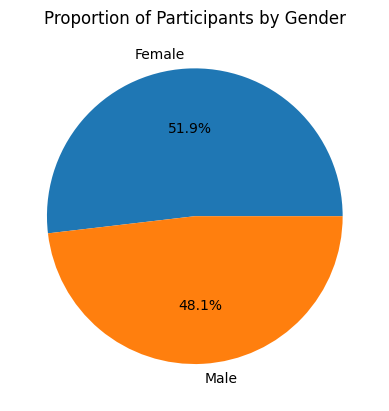

Study ID: NCT04130438
No results found.
Study ID: NCT03580590
No results found.
Study ID: NCT04869150
No results found.
Study ID: NCT04222855
No results found.
Study ID: NCT03472495
Total Participants: 19
Female Count: 10 (52.63%)
Male Count: 9 (47.37%)


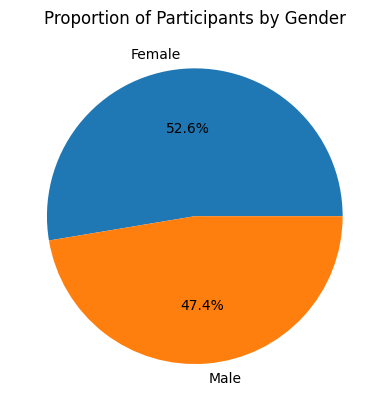

Study ID: NCT04310995
No results found.
Study ID: NCT01211808
No results found.
Study ID: NCT00911508
Total Participants: 2204
Female Count: 819 (37.16%)
Male Count: 1385 (62.84%)


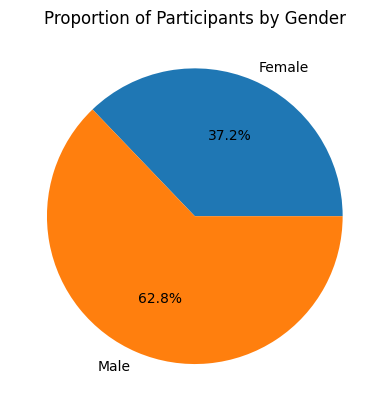

Study ID: NCT01816191
No results found.
Study ID: NCT05122780
No results found.
Study ID: NCT02938260
No results found.
Study ID: NCT00684489
No results found.
Study ID: NCT02364089
No results found.
Study ID: NCT01021176
No results found.
Study ID: NCT00712894
No results found.
Study ID: NCT01124760
No results found.
Study ID: NCT01816529
No results found.
Study ID: NCT02080780
Total Participants: 24
Female Count: 7 (29.17%)
Male Count: 17 (70.83%)


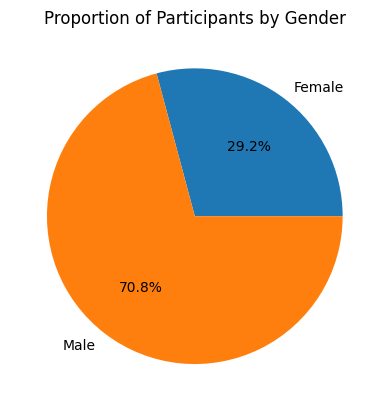

Study ID: NCT05797220
No results found.
Study ID: NCT01645826
No results found.
Study ID: NCT02319148
Total Participants: 22
Female Count: 0 (0.00%)
Male Count: 22 (100.00%)


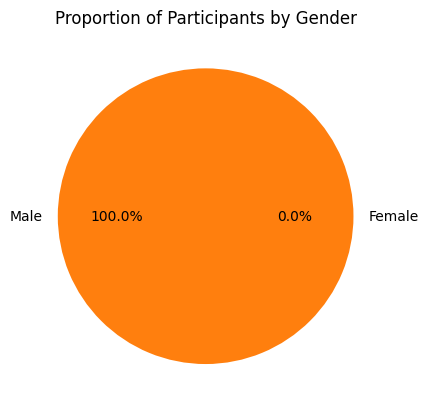

Study ID: NCT02308748
Total Participants: 22
Female Count: 9 (40.91%)
Male Count: 13 (59.09%)


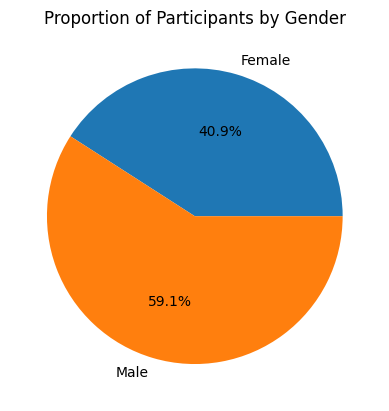

Study ID: NCT01852565
No results found.
Study ID: NCT01176565
Total Participants: 1000
Female Count: 380 (38.00%)
Male Count: 620 (62.00%)


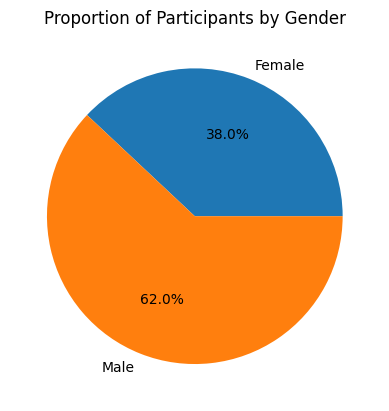

Study ID: NCT02503865
Total Participants: 351
Female Count: 184 (52.42%)
Male Count: 167 (47.58%)


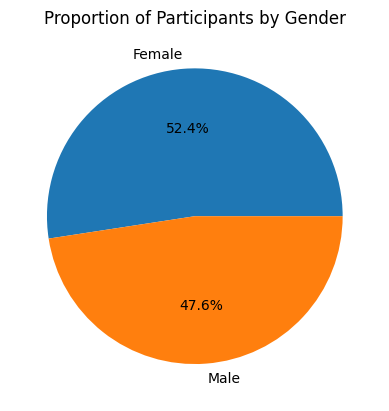

Study ID: NCT02025465
No results found.
Study ID: NCT00283686
Total Participants: 558
Female Count: 275 (49.28%)
Male Count: 283 (50.72%)


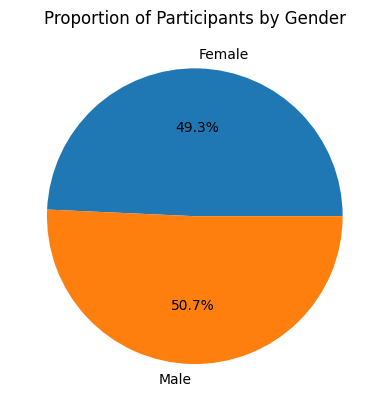

Study ID: NCT00313157
No results found.
Study ID: NCT01422382
Total Participants: 28
Female Count: 11 (39.29%)
Male Count: 17 (60.71%)


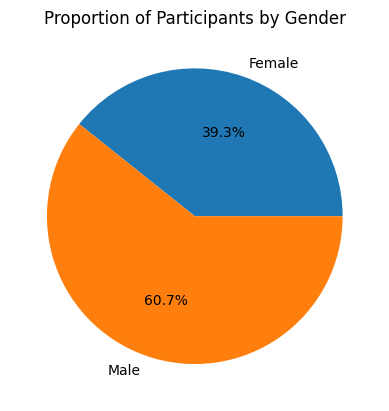

Study ID: NCT00000620
No participants found.
Study ID: NCT01688648
No results found.
Study ID: NCT00834925
No results found.
Study ID: NCT02203630
Total Participants: 17
Female Count: 7 (41.18%)
Male Count: 10 (58.82%)


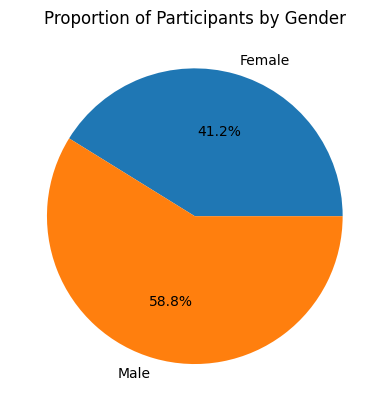

Study ID: NCT01549496
No results found.
Study ID: NCT01914926
Total Participants: 54
Female Count: 32 (59.26%)
Male Count: 22 (40.74%)


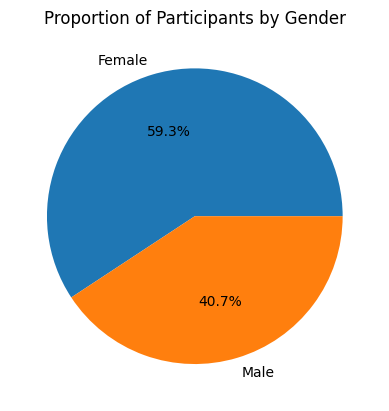

Study ID: NCT05162222
No results found.
Study ID: NCT06045819
No results found.
Study ID: NCT02024919
No results found.
Study ID: NCT00863213
No results found.
Study ID: NCT01279499
No results found.
Study ID: NCT02158013
No results found.
Study ID: NCT02419534
No results found.
Study ID: NCT00733239
No results found.
Study ID: NCT03212716
No results found.
Study ID: NCT01352416
No participants found.
Study ID: NCT06376916
No results found.
Study ID: NCT01408524
No results found.
Study ID: NCT00803634
Total Participants: 104
Female Count: 54 (51.92%)
Male Count: 50 (48.08%)


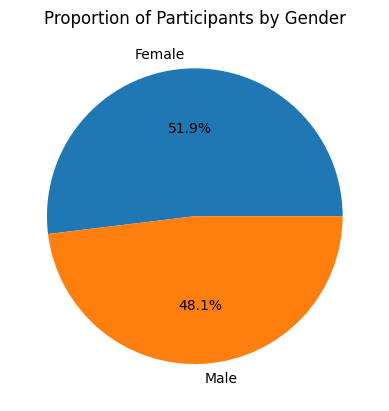

Study ID: NCT04551963
Total Participants: 26
Female Count: 8 (30.77%)
Male Count: 18 (69.23%)


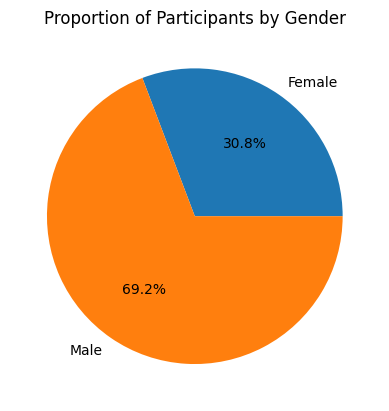

Study ID: NCT06175663
No results found.
Study ID: NCT00593463
No results found.
Study ID: NCT04887818
No results found.
Study ID: NCT01594619
No results found.
Study ID: NCT02391337
Total Participants: 161
Female Count: 74 (45.96%)
Male Count: 87 (54.04%)


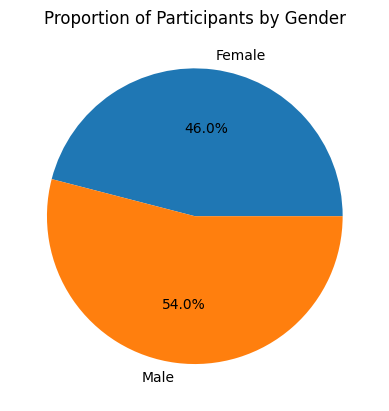

Study ID: NCT01217515
Total Participants: 465
Female Count: 263 (56.56%)
Male Count: 202 (43.44%)


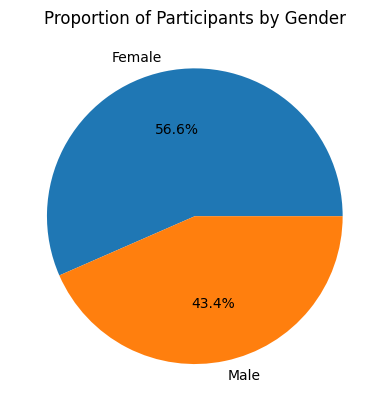

Study ID: NCT02020915
No results found.
Study ID: NCT05745337
No results found.
Study ID: NCT04141553
No results found.
Study ID: NCT04777045
No results found.
Study ID: NCT04017845
No results found.
Study ID: NCT01151345
Total Participants: 26
Female Count: 12 (46.15%)
Male Count: 14 (53.85%)


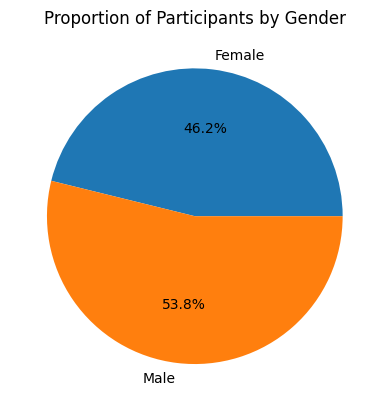

Study ID: NCT02807909
No results found.
Study ID: NCT04234477
No results found.
Study ID: NCT02801305
No results found.
Study ID: NCT04276298
No results found.
Study ID: NCT04604483
No results found.
Study ID: NCT05294887
No results found.
Study ID: NCT03930433
No results found.
Study ID: NCT00582777
No results found.
Study ID: NCT01771978
No results found.
Study ID: NCT00000478
No results found.
Study ID: NCT03747107
No results found.
Study ID: NCT05391893
No results found.
Study ID: NCT04991961
No results found.
Study ID: NCT00713011
No results found.
Study ID: NCT00000556
No results found.
Study ID: NCT01261156
No results found.
Study ID: NCT05950971
No results found.
Study ID: NCT02526888
No results found.
Study ID: NCT02947711
No results found.
Study ID: NCT02300259
Total Participants: 48
Female Count: 13 (27.08%)
Male Count: 35 (72.92%)


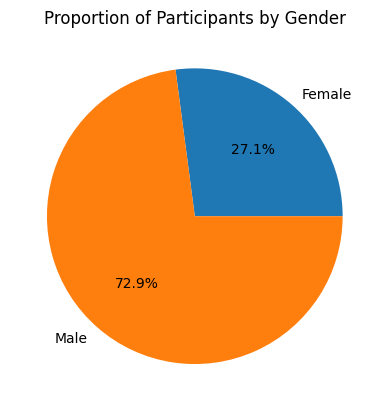

Study ID: NCT03529149
No results found.
Study ID: NCT05661942
No results found.
Study ID: NCT04154800
No results found.
Study ID: NCT00893100
No results found.
Study ID: NCT04330300
No results found.
Study ID: NCT05691959
No results found.
Study ID: NCT02922452
No results found.
Study ID: NCT05091775
No results found.
Study ID: NCT02010970
No results found.
Study ID: NCT00645463
No results found.
Study ID: NCT00039975
No results found.
Study ID: NCT03888170
No results found.
Study ID: NCT03070470
Total Participants: 60
Female Count: 22 (36.67%)
Male Count: 38 (63.33%)


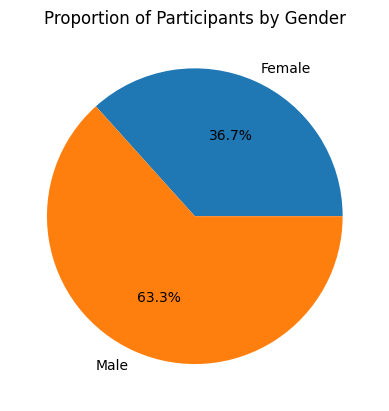

Study ID: NCT00223717
No results found.
Study ID: NCT00578617
Total Participants: 60
Female Count: 14 (23.33%)
Male Count: 46 (76.67%)


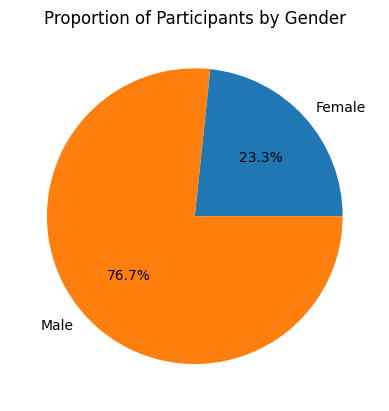

Study ID: NCT04513509
No results found.
Study ID: NCT04153032
No results found.
Study ID: NCT02052011
Total Participants: 31
Female Count: 22 (70.97%)
Male Count: 9 (29.03%)


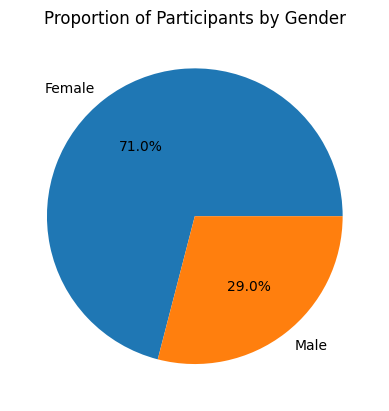

In [ ]:

import requests
import json
from pytrials.client import ClinicalTrials
import pandas as pd


# Initialize ClinicalTrials client
ct = ClinicalTrials()

# Get 50 full studies related to Anxiety
ct.get_full_studies(search_expr="Diltiazem", max_studies=50)

# Get the NCTId, Condition, and Brief title fields from 1000 studies related to Bipolar in CSV format
bipolar_fields = ct.get_study_fields(
    search_expr="Diltiazem",
    fields=["NCT Number", "Conditions", "Study Title"],
    max_studies=1000,
    fmt="csv",
)

# Read the CSV data into a pandas DataFrame
studies = pd.DataFrame.from_records(bipolar_fields[1:], columns=bipolar_fields[0])
list_NCT = studies["NCT Number"]

# URL of the API endpoint
api_url = 'https://clinicaltrials.gov/api/v2/studies/'

for study_id in list_NCT:
    response = requests.get(api_url + study_id)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        data = response.json()

        # Check if the study has results
        if data.get("hasResults", False) == True:
            # Initialize counters for female and male participants
            female_count = 0
            male_count = 0
            total_female_count = 0
            total_male_count = 0

            # Parse the JSON data to count the participants
            if "resultsSection" in data and "baselineCharacteristicsModule" in data["resultsSection"]:
                for measure in data["resultsSection"]["baselineCharacteristicsModule"]["measures"]:
                    if measure["title"] == "Sex: Female, Male":
                        for category in measure["classes"][0]["categories"]:
                            if category["title"] == "Female":
                                female_values = [int(measurement["value"]) for measurement in category["measurements"]]
                                total_female_count = sum(female_values[:-1])
                                if sum(female_values[:-1]) == female_values[-1]:
                                    female_count = total_female_count
                                else:
                                    female_count = sum(female_values)
                            elif category["title"] == "Male":
                                male_values = [int(measurement["value"]) for measurement in category["measurements"]]
                                total_male_count = sum(male_values[:-1])
                                if sum(male_values[:-1]) == male_values[-1]:
                                    male_count = total_male_count
                                else:
                                    male_count = sum(male_values)

                total_participants = female_count + male_count

                if total_participants > 0:
                    # Calculate proportions
                    female_proportion = female_count / total_participants
                    male_proportion = male_count / total_participants

                    # Print results
                    print(f"Study ID: {study_id}")
                    print(f"Total Participants: {total_participants}")
                    print(f"Female Count: {female_count} ({female_proportion:.2%})")
                    print(f"Male Count: {male_count} ({male_proportion:.2%})")
                    #plot results
                    plt.pie([female_proportion, male_proportion], labels=["Female", "Male"], autopct="%1.1f%%")
                    plt.title("Proportion of Participants by Gender")
                    plt.show()
                else:
                    print(f"Study ID: {study_id}")
                    print("No participants found.")
            else:
                print(f"Study ID: {study_id}")
                print("No baseline characteristics found.")
        else:
            print(f"Study ID: {study_id}")
            print("No results found.")

    else:
        print(f"Failed to retrieve data for study ID {study_id}: {response.status_code}")
